In [1]:
!pip install scikit-image

In [2]:
!pip install imutils

In [3]:
!pip install requests

In [4]:
!pip install cv

In [5]:
!pip install opencv-python

In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream = True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)


In [3]:
original.format


'JPEG'

In [4]:
tampered.format

'PNG'

In [5]:
print(original.size, tampered.size)

(1200, 800) (282, 179)


In [6]:
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png')
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


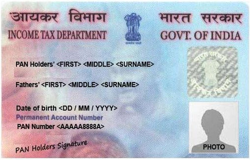

In [7]:
original

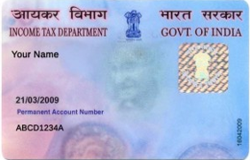

In [8]:
tampered

In [9]:
original = cv2.imread('pan_card_tampering\image\original.png')


In [10]:
original

array([[[254, 255, 253],
        [254, 255, 253],
        [253, 254, 252],
        ...,
        [253, 253, 254],
        [251, 253, 254],
        [250, 254, 255]],

       [[254, 255, 253],
        [251, 252, 250],
        [249, 250, 248],
        ...,
        [249, 249, 246],
        [248, 249, 248],
        [249, 252, 252]],

       [[253, 253, 252],
        [249, 250, 248],
        [252, 253, 251],
        ...,
        [252, 252, 243],
        [248, 249, 244],
        [251, 251, 251]],

       ...,

       [[246, 250, 248],
        [225, 228, 233],
        [211, 213, 227],
        ...,
        [207, 193, 177],
        [211, 202, 191],
        [244, 240, 232]],

       [[250, 252, 249],
        [246, 248, 249],
        [242, 244, 251],
        ...,
        [245, 240, 233],
        [245, 243, 236],
        [249, 249, 243]],

       [[253, 254, 250],
        [253, 255, 253],
        [250, 253, 255],
        ...,
        [255, 255, 255],
        [253, 255, 254],
        [251, 254, 252]]

In [11]:
from PIL import Image
import numpy as np

# Open an image file
tampered = Image.open('C:\\Users\\prave\\ML_Projects\\pan_card_tampering\\image\\tampered.png')


# Convert the image to numpy array if needed
tampered_array = np.array(tampered)


In [12]:
tampered_array

array([[[255, 253, 255, 255],
        [255, 254, 255, 255],
        [255, 253, 255, 255],
        ...,
        [247, 254, 253, 255],
        [250, 252, 253, 255],
        [255, 254, 255, 255]],

       [[255, 254, 255, 255],
        [255, 254, 255, 255],
        [255, 253, 255, 255],
        ...,
        [242, 254, 255, 255],
        [248, 252, 253, 255],
        [253, 253, 255, 255]],

       [[255, 253, 255, 255],
        [254, 253, 255, 255],
        [252, 249, 254, 255],
        ...,
        [224, 243, 251, 255],
        [247, 254, 255, 255],
        [252, 252, 254, 255]],

       ...,

       [[251, 254, 253, 255],
        [254, 255, 255, 255],
        [254, 248, 249, 255],
        ...,
        [223, 240, 251, 255],
        [243, 254, 255, 255],
        [248, 253, 254, 255]],

       [[252, 255, 255, 255],
        [252, 254, 253, 255],
        [254, 252, 253, 255],
        ...,
        [239, 251, 255, 255],
        [249, 255, 255, 255],
        [252, 254, 254, 255]],

       [[254

In [13]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)


In [16]:
original_gray

array([[254, 254, 253, ..., 253, 253, 254],
       [254, 251, 249, ..., 248, 249, 252],
       [253, 249, 252, ..., 249, 247, 251],
       ...,
       [249, 229, 217, ..., 190, 200, 238],
       [251, 248, 246, ..., 238, 241, 247],
       [253, 254, 253, ..., 255, 254, 253]], dtype=uint8)

In [14]:
tampered_gray = cv2.cvtColor(tampered_array, cv2.COLOR_BGR2GRAY )

In [15]:
tampered_gray

array([[254, 254, 254, ..., 253, 252, 254],
       [254, 254, 254, ..., 253, 252, 254],
       [254, 254, 251, ..., 243, 254, 253],
       ...,
       [253, 255, 249, ..., 241, 253, 253],
       [255, 253, 253, ..., 251, 254, 254],
       [255, 255, 254, ..., 254, 253, 250]], dtype=uint8)

In [22]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full = True)
diff = (diff * 255).astype('uint8')
print("SSIM: {}".format(score))

SSIM: 0.3185240351145132


In [23]:
thresh = cv2.threshold(diff, 0,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [25]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x,y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered_array, (x,y), (x + w, y + h), (0, 0, 255), 2)

Original format image


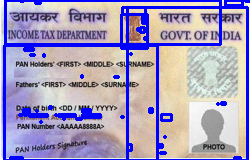

In [26]:
print("Original format image")
Image.fromarray(original)

Tampered format image


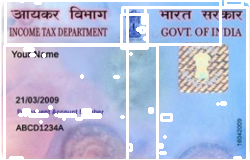

In [27]:
print('Tampered format image')
Image.fromarray(tampered_array)

Different Image


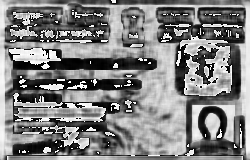

In [28]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


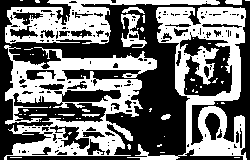

In [29]:
print('Threshold Image')
Image.fromarray(thresh)